In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tb = pd.read_csv('datset/tb cases.csv')
co2 = pd.read_csv('datset/philippines-carbon-co2-emissions.csv')
gdp = pd.read_csv('datset/philippines-gdp-gross-domestic-product.csv')
inflation = pd.read_csv('datset/philippines-inflation-rate-cpi (1).csv')
literacy = pd.read_csv("datset/philippines-literacy-rate.csv")
poverty = pd.read_csv('datset/share-of-population-in-extreme-poverty.csv')
unemployment = pd.read_csv('datset/philippines-unemployment-rate.csv')

#First Look on the Dataset (Multiple y-axis Line Chart)

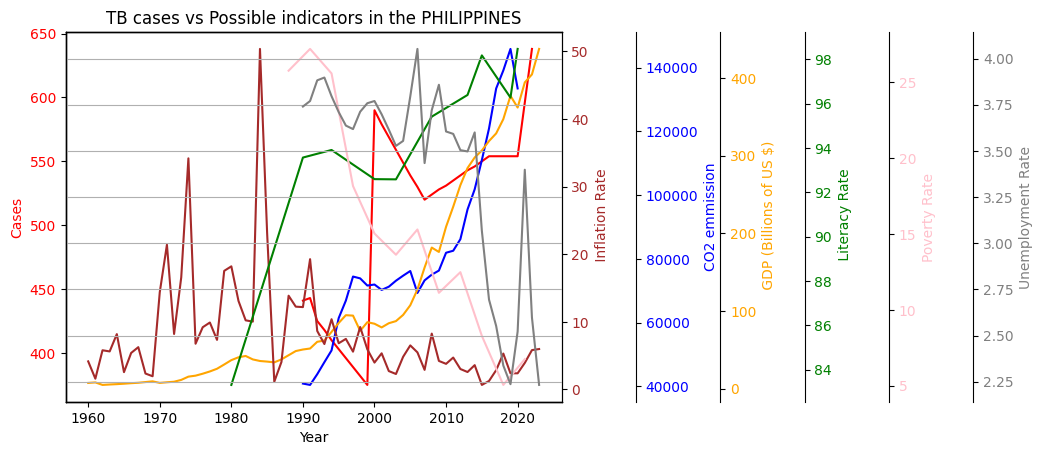

In [ ]:
fig,ax1 = plt.subplots()
ax1.plot(tb['Date'],tb['cases(per 100000)'],color='Red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases',color="Red")
ax1.tick_params(axis = 'y',labelcolor='Red')

ax2 = ax1.twinx()
ax2.plot(co2["Date"],co2['CO2 emmision'],color='Blue')
ax2.set_ylabel('CO2 emmission', color='Blue')
ax2.tick_params(axis='y',labelcolor='Blue')
ax2.spines['right'].set_position(('axes',1.15))

ax3 = ax1.twinx()
ax3.plot(gdp["Date"],gdp[' GDP (Billions of US $)'],color='orange')
ax3.set_ylabel(' GDP (Billions of US $)', color='Orange')
ax3.tick_params(axis='y',labelcolor='orange')
ax3.spines['right'].set_position(('axes',1.32))

ax4 = ax1.twinx()
ax4.plot(inflation["Date"],inflation[' Inflation Rate'],color='Brown')
ax4.set_ylabel(' Inflation Rate', color='Brown')
ax4.tick_params(axis='y',labelcolor='Brown')

ax5 = ax1.twinx()
ax5.plot(literacy["Date"],literacy['Literacy Rate'],color='Green')
ax5.set_ylabel(' Literacy Rate', color='Green')
ax5.tick_params(axis='y',labelcolor='Green')
ax5.spines['right'].set_position(('axes',1.49))

ax6 = ax1.twinx()
ax6.plot(poverty["Date"],poverty['$2.15 a day - Share of population in poverty'],color='Pink')
ax6.set_ylabel('Poverty Rate', color='Pink')
ax6.tick_params(axis='y',labelcolor='Pink')
ax6.spines['right'].set_position(('axes',1.66))


ax7 = ax1.twinx()
ax7.plot(unemployment["Date"],unemployment[' Unemployment Rate'],color='Grey')
ax7.set_ylabel('Unemployment Rate', color='Grey')
ax7.tick_params(axis='y',labelcolor='Grey')
ax7.spines['right'].set_position(('axes',1.83))


ax1.set_title('TB cases vs Possible indicators in the PHILIPPINES')
plt.grid()
fig.show()

#First Look on the Dataset Individually

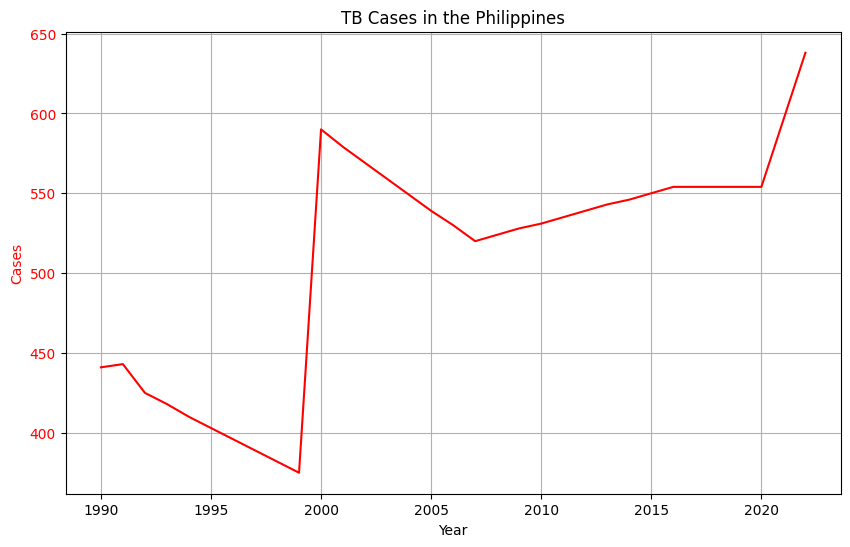

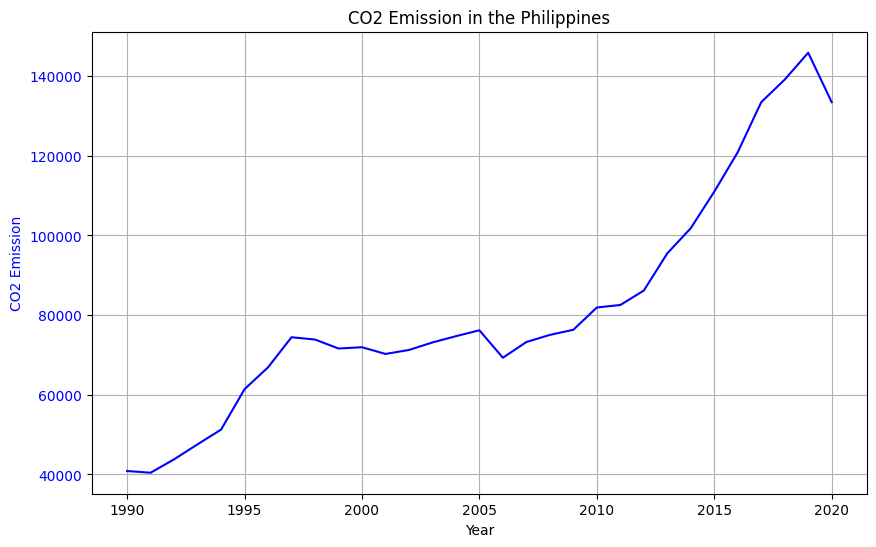

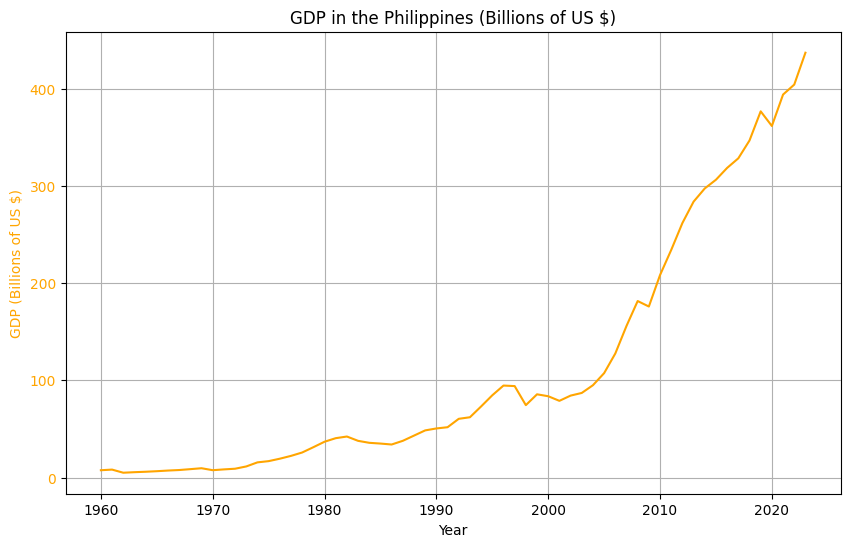

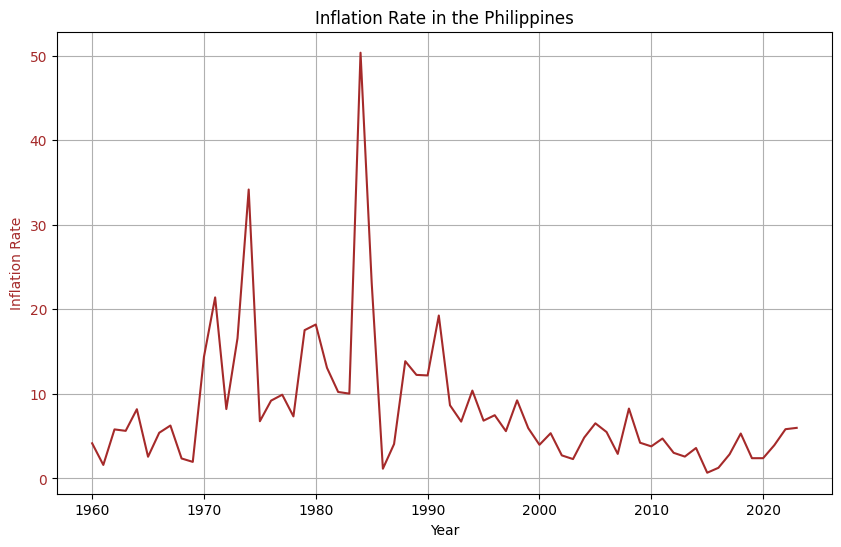

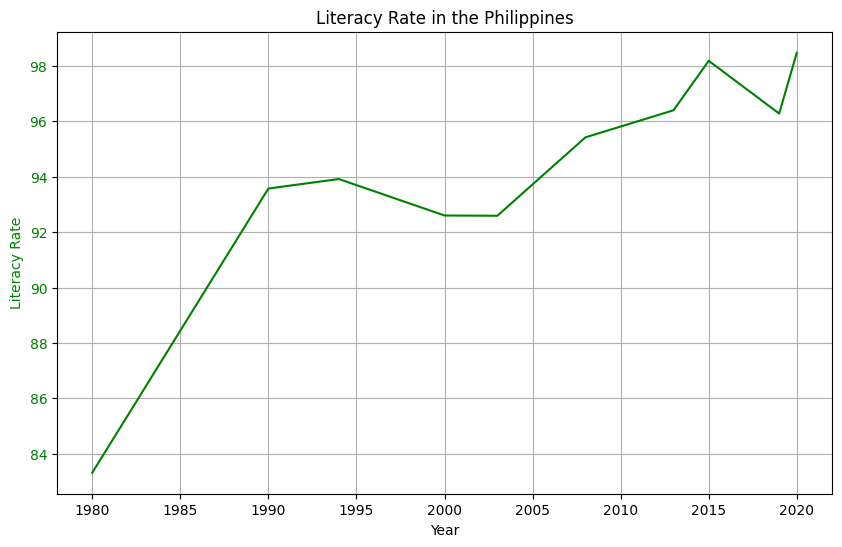

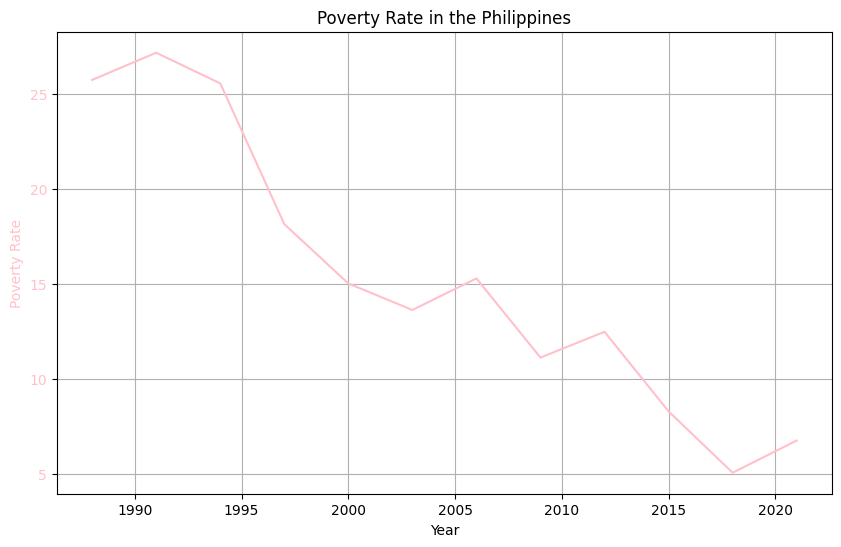

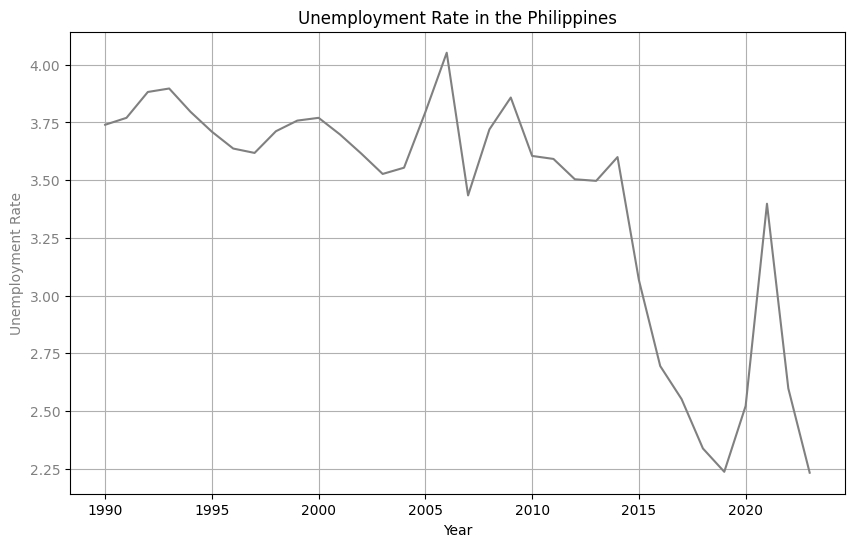

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure and axes for each dataset
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(tb['Date'], tb['cases(per 100000)'], color='Red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases', color="Red")
ax1.tick_params(axis='y', labelcolor='Red')
ax1.set_title('TB Cases in the Philippines')
ax1.grid(True)

fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(co2["Date"], co2['CO2 emmision'], color='Blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Emission', color='Blue')
ax2.tick_params(axis='y', labelcolor='Blue')
ax2.set_title('CO2 Emission in the Philippines')
ax2.grid(True)

fig, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(gdp["Date"], gdp[' GDP (Billions of US $)'], color='orange')
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP (Billions of US $)', color='Orange')
ax3.tick_params(axis='y', labelcolor='Orange')
ax3.set_title('GDP in the Philippines (Billions of US $)')
ax3.grid(True)

fig, ax4 = plt.subplots(figsize=(10, 6))
ax4.plot(inflation["Date"], inflation[' Inflation Rate'], color='Brown')
ax4.set_xlabel('Year')
ax4.set_ylabel('Inflation Rate', color='Brown')
ax4.tick_params(axis='y', labelcolor='Brown')
ax4.set_title('Inflation Rate in the Philippines')
ax4.grid(True)

fig, ax5 = plt.subplots(figsize=(10, 6))
ax5.plot(literacy["Date"], literacy['Literacy Rate'], color='Green')
ax5.set_xlabel('Year')
ax5.set_ylabel('Literacy Rate', color='Green')
ax5.tick_params(axis='y', labelcolor='Green')
ax5.set_title('Literacy Rate in the Philippines')
ax5.grid(True)

fig, ax6 = plt.subplots(figsize=(10, 6))
ax6.plot(poverty["Date"], poverty['$2.15 a day - Share of population in poverty'], color='Pink')
ax6.set_xlabel('Year')
ax6.set_ylabel('Poverty Rate', color='Pink')
ax6.tick_params(axis='y', labelcolor='Pink')
ax6.set_title('Poverty Rate in the Philippines')
ax6.grid(True)


fig, ax7 = plt.subplots(figsize=(10, 6))
ax7.plot(unemployment["Date"], unemployment[' Unemployment Rate'], color='Grey')
ax7.set_xlabel('Year')
ax7.set_ylabel('Unemployment Rate', color='Grey')
ax7.tick_params(axis='y', labelcolor='Grey')
ax7.set_title('Unemployment Rate in the Philippines')
ax7.grid(True)

# Show all plots
plt.show()


#Preprocessing

In [ ]:
def changeFormat (df,x,y):
    df = df[(df[x].dt.year >= 1990) & (df[x].dt.year <= 2020)]

    full_year_range = pd.date_range(start='1990', end='2020', freq='Y')

    df.set_index(x, inplace=True)
    df_reindexed = df.reindex(full_year_range)

    df_reindexed[y] = df_reindexed[y].interpolate(method='linear')
    print(df_reindexed)
    return df_reindexed

In [ ]:

import numpy as np
def changeFormat(df,x,y):
    # Reconstruct full year range from 1980 to 2020
    all_years = np.arange(1980, 2021)

    # Create a new DataFrame with all years
    full_df = pd.DataFrame({'Date': all_years})

    # Merge with the original data to match the years
    merged_df = pd.merge(full_df, df, on='Date', how='left')

    # Interpolate missing literacy rates
    merged_df[y] = merged_df[y].interpolate(method='linear')
    merged_df = merged_df[(merged_df['Date'] >= 1990) & (merged_df['Date'] <= 2020)]
    return merged_df

In [ ]:
literacy_changed = changeFormat(literacy,'Date','Literacy Rate')
tb_changed = changeFormat(tb,'Date','cases(per 100000)')
co2_changed = changeFormat(co2,'Date','CO2 emmision')
gdp_changed = changeFormat(gdp,'Date',' GDP (Billions of US $)')
inflation_changed = changeFormat(inflation,'Date',' Inflation Rate')
poverty_changed = changeFormat(poverty,'Date','$2.15 a day - Share of population in poverty')
unemployment_changed = changeFormat(unemployment,'Date',' Unemployment Rate')


In [ ]:
new_dataframe_combined = tb_changed.copy()
new_dataframe_combined['Literacy Rate'] = literacy_changed['Literacy Rate']
new_dataframe_combined['CO2 emission(Kilotons)'] = co2_changed['CO2 emmision']
new_dataframe_combined[' GDP (Billions of US $)'] = gdp_changed[' GDP (Billions of US $)']
new_dataframe_combined[' Inflation Rate'] = inflation_changed[' Inflation Rate']
new_dataframe_combined['Poverty Rate'] = poverty_changed['$2.15 a day - Share of population in poverty']
new_dataframe_combined['Unemployment Rate'] = unemployment_changed[' Unemployment Rate']

In [ ]:
#new_dataframe_combined = new_dataframe_combined.set_index('Date')
new_dataframe_combined

,Date,cases(per 100000),Literacy Rate,CO2 emission(Kilotons),GDP (Billions of US $),Inflation Rate,Poverty Rate,Unemployment Rate
10,1990,441.0,93.573900,40868.9,50.508287,12.1774,26.716957,3.740
11,1991,443.0,93.659425,40442.2,51.784145,19.2615,27.195000,3.770
12,1992,425.0,93.744950,43803.7,60.422328,8.6510,26.656667,3.882
13,1993,418.0,93.830475,47577.9,62.036529,6.7163,26.118335,3.897
14,1994,410.0,93.916000,51270.0,73.159337,10.3865,25.580002,3.796
15,1995,403.0,93.696683,61414.8,84.644329,6.8320,23.107215,3.710
16,1996,396.0,93.477367,66899.8,94.648084,7.4761,20.634429,3.637
17,1997,389.0,93.258050,74447.8,94.106318,5.5903,18.161642,3.618
18,1998,382.0,93.038733,73870.2,74.492416,9.2349,17.118425,3.712
19,1999,375.0,92.819417,71621.2,85.640171,5.9390,16.075209,3.758


### Correlation

<Axes: >

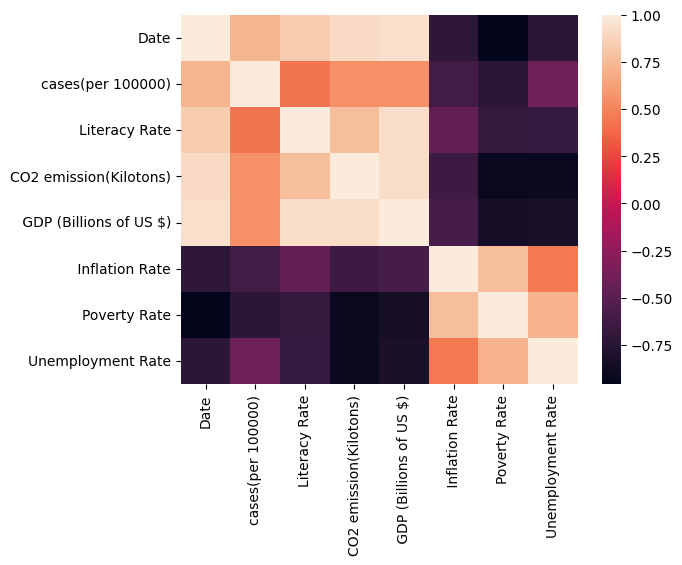

In [ ]:
import seaborn as sns
sns.heatmap(new_dataframe_combined.corr())

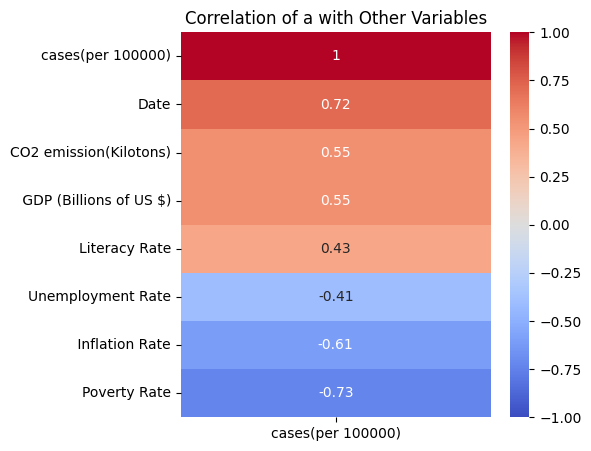

In [ ]:
corr_matrix = new_dataframe_combined.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix[['cases(per 100000)']].sort_values(by='cases(per 100000)', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation of a with Other Variables')
plt.show()

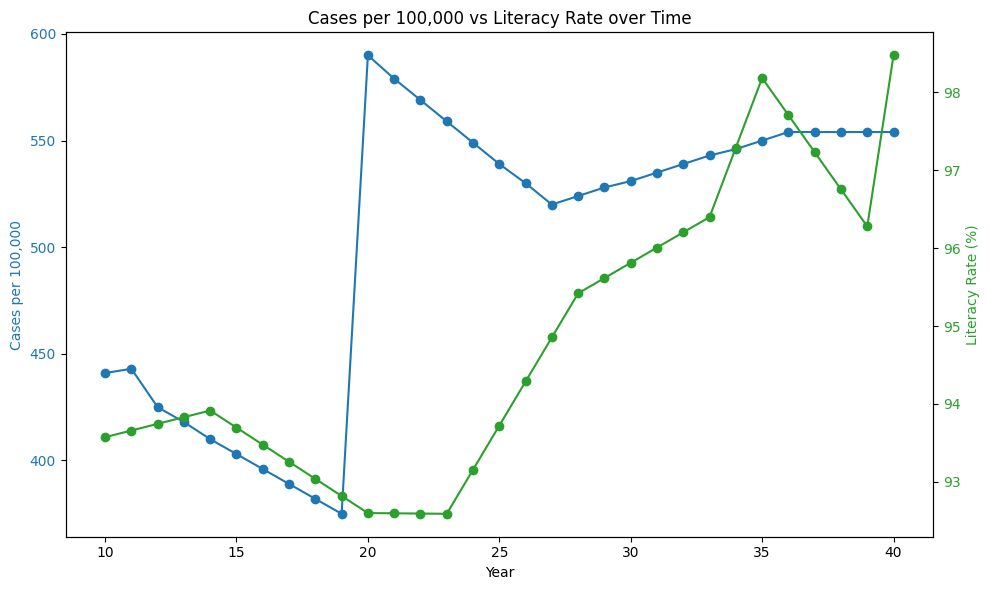

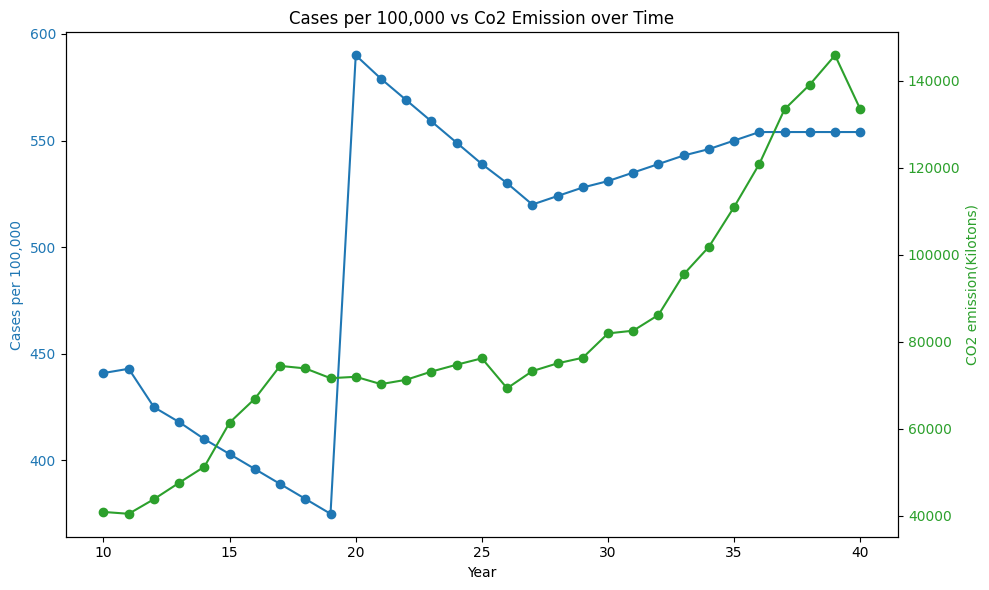

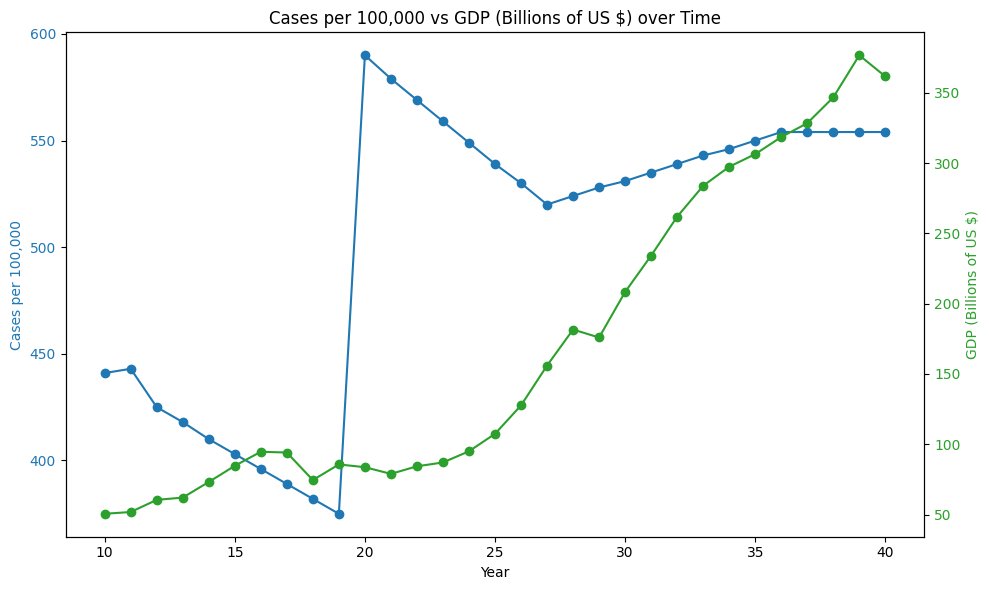

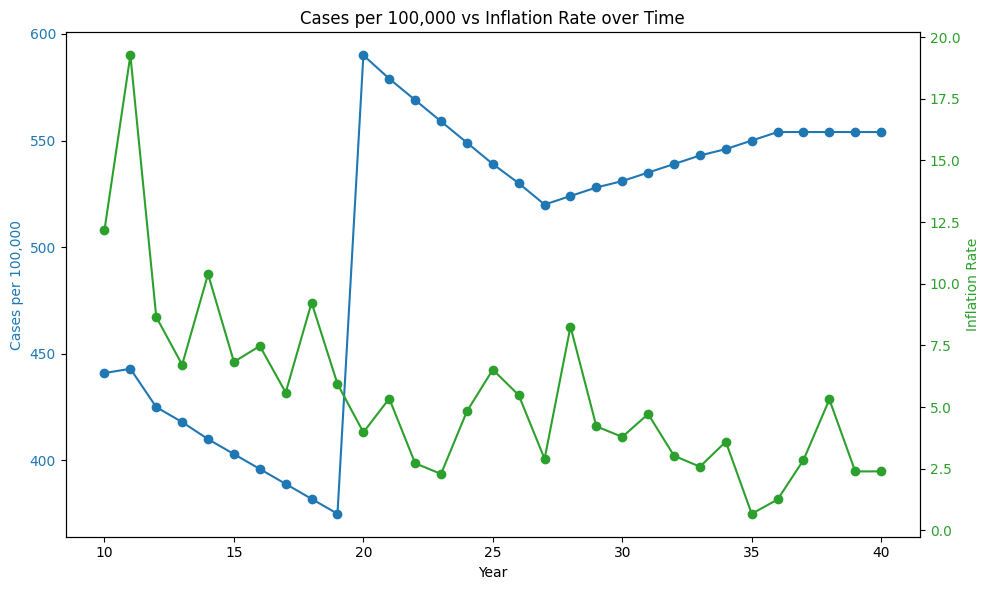

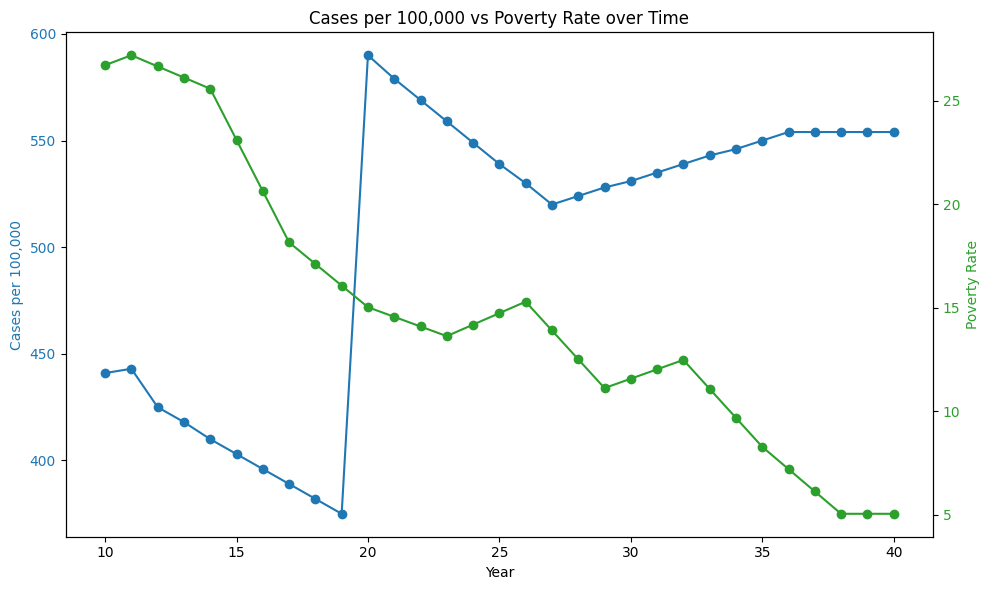

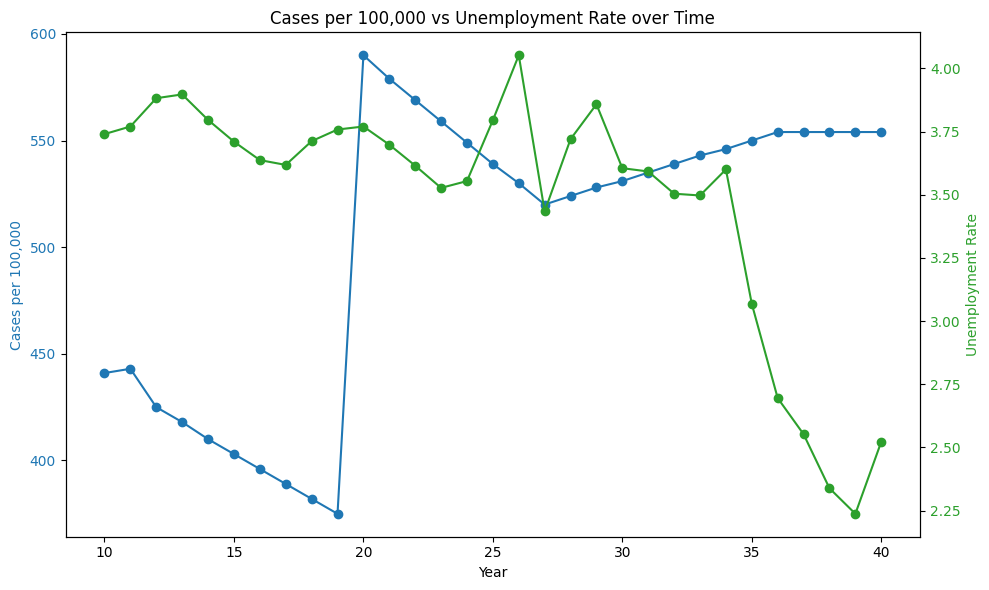

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Literacy Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Literacy Rate (%)', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined['Literacy Rate'], color='tab:green', label='Literacy Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs Literacy Rate over Time')
plt.tight_layout()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Co2 Emission
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 emission(Kilotons)', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined['CO2 emission(Kilotons)'], color='tab:green', label='CO2 emission(Kilotons)', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs Co2 Emission over Time')
plt.tight_layout()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for GDP
ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billions of US $)', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined[' GDP (Billions of US $)'], color='tab:green', label='GDP (Billions of US $)', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs GDP (Billions of US $) over Time')
plt.tight_layout()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Inflation Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined[' Inflation Rate'], color='tab:green', label='Inflation Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs Inflation Rate over Time')
plt.tight_layout()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Inflation Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Poverty Rate', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined['Poverty Rate'], color='tab:green', label='Poverty Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs Poverty Rate over Time')
plt.tight_layout()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Cases per 100,000', color='tab:blue')
ax1.plot(new_dataframe_combined.index, new_dataframe_combined['cases(per 100000)'], color='tab:blue', label='Cases per 100,000', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for Inflation Rate
ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Rate', color='tab:green')
ax2.plot(new_dataframe_combined.index, new_dataframe_combined['Unemployment Rate'], color='tab:green', label='Unemployment Rate', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Cases per 100,000 vs Unemployment Rate over Time')
plt.tight_layout()

### Feature Selection (To select which factor influences the number of cases of TB in the Philippines)

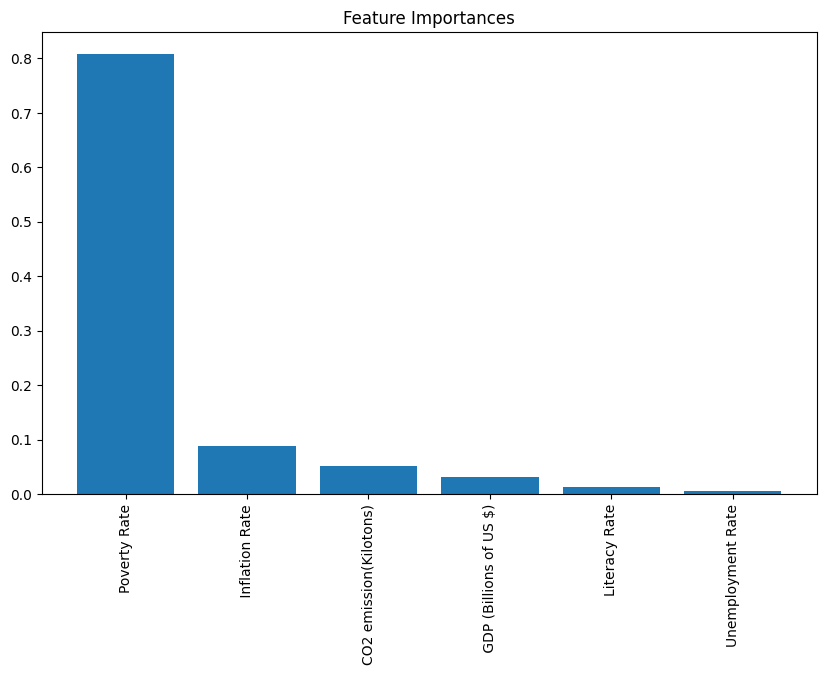

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assume 'cases(per 100000)' is the target variable
X = new_dataframe_combined.drop(columns=['cases(per 100000)','Date'])
y = new_dataframe_combined['cases(per 100000)']

# Fit Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
features = new_dataframe_combined.drop(columns=['Date'])  # Drop non-numeric or irrelevant columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
features_pca = pca.fit_transform(features_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

Explained variance ratio: [0.73978794 0.12731616 0.05812636 0.05231866]
Number of components: 4


Cumulative Explained Variance: [0.79098382 0.90598596 0.96876598 0.9936394  0.99776112 1.        ]


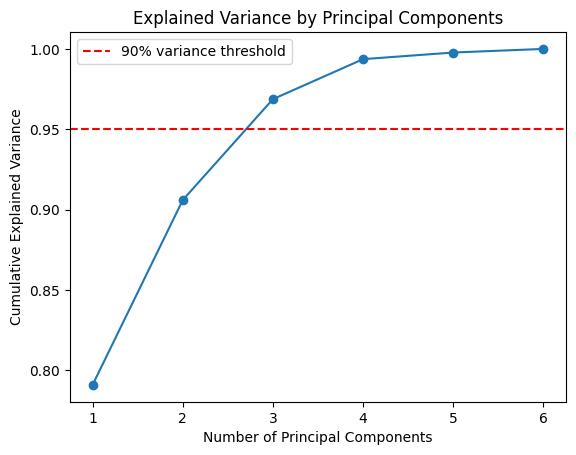

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", explained_variance)

# Plot the explained variance
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="90% variance threshold")
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

In [ ]:
# Get PCA loadings
loadings = pca.components_

# Create a DataFrame for better interpretation
import pandas as pd
feature_names = X.columns  # Replace with your feature names
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(len(loadings))], index=feature_names)

# Display loadings for the top PCs (e.g., first 3 PCs)
print(loadings_df.iloc[:, :2])  # Adjust column slicing based on chosen PCs


                              PC1       PC2
Literacy Rate            0.392243  0.366778
CO2 emission(Kilotons)   0.447462  0.052446
 GDP (Billions of US $)  0.444235  0.205882
 Inflation Rate         -0.330815  0.797689
Poverty Rate            -0.424915  0.286907
Unemployment Rate       -0.398230 -0.318924


In [ ]:
# Identify top features for each retained PC
n_top_features = 3  # Number of features to keep per PC
top_features = loadings_df.abs().nlargest(n_top_features, columns=["PC1", "PC2"])  # Adjust PCs
print("Top features contributing to retained components:\n", top_features)


Top features contributing to retained components:
                               PC1       PC2       PC3       PC4       PC5  \
CO2 emission(Kilotons)   0.447462  0.052446  0.291469  0.151691  0.530272   
 GDP (Billions of US $)  0.444235  0.205882  0.238991  0.036060  0.518423   
Poverty Rate             0.424915  0.286907  0.072579  0.730332  0.427347   

                              PC6  
CO2 emission(Kilotons)   0.638651  
 GDP (Billions of US $)  0.658094  
Poverty Rate             0.125915  


### Forecast

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target
X = new_dataframe_combined.drop(columns=["cases(per 100000)",'CO2 emission(Kilotons)','Literacy Rate','Unemployment Rate'])
y = new_dataframe_combined["cases(per 100000)"]

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Forecast for the next two years
future_features = pd.read_csv("datset/last 2 years.csv")  # Assuming feature values for 2021 and 2022 are available
forecast = model.predict(future_features)
print("Forecasted TB cases:", forecast)
tbcases = pd.read_csv("datset/tb cases.csv")
#Evaluate the model

Forecasted TB cases: [551.14 548.11]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

#Evaluation of Model
print("Evaluation of Model using the features that are reduced using feature Importance")
# Assuming actual_values and predicted_values are available
actual_values = tbcases['cases(per 100000)'][-2:]  # Actual values for 2021, 2022
predicted_values = forecast  # Forecasted TB cases from the model

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)

# Calculate RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)
print("R-squared:", r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_values, predicted_values)
print("MAPE:", mape)

# Calculate Explained Variance Score
evs = explained_variance_score(actual_values, predicted_values)
print("Explained Variance Score:", evs)

# Calculate Adjusted R-squared
n = len(actual_values)  # Number of data points
p = X.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Evaluation of Model using the features that are reduced using feature Importance
MAE: 67.375
MSE: 5046.31585
RMSE: 71.03742569941565
R-squared: -10.442893083900227
MAPE: 10.80809366518693
Explained Variance Score: -0.1494903061224475
Adjusted R-squared: 4.814297694633408


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


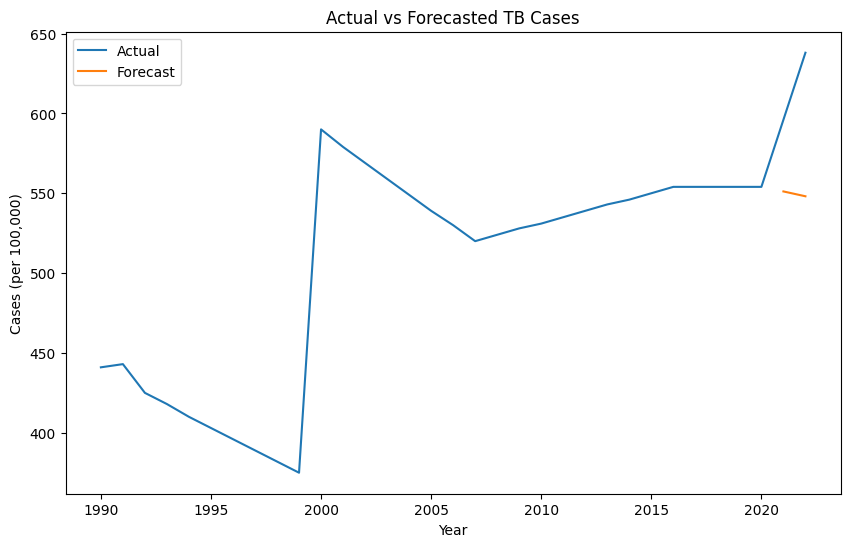

In [ ]:
import matplotlib.pyplot as plt

forecaste_data = {'Date': [2021,2022], 'Forecast':[forecast[0],forecast[1]]}
forecasted = pd.DataFrame(forecaste_data)

plt.figure(figsize=(10, 6))
plt.plot(tbcases.Date, tbcases['cases(per 100000)'], label='Actual')
plt.plot(forecasted['Date'], forecasted['Forecast'], label='Forecast', linestyle='-')
plt.title('Actual vs Forecasted TB Cases')
plt.xlabel('Year')
plt.ylabel('Cases (per 100,000)')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features and target
X = new_dataframe_combined.drop(columns=["cases(per 100000)",' Inflation Rate','Literacy Rate','Unemployment Rate'])
y = new_dataframe_combined["cases(per 100000)"]


# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Forecast for the next two years
future_features = pd.read_csv("datset/last 2 years 2 .csv")  # Assuming feature values for 2021 and 2022 are available
forecast = model.predict(future_features)
print("Forecasted TB cases:", forecast)
tbcases = pd.read_csv("datset/tb cases.csv")




Forecasted TB cases: [554.   553.96]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

#Evaluation of Model
print("Evaluation of Model using the features that are reduced using the PCA")
# Assuming actual_values and predicted_values are available
actual_values = tbcases['cases(per 100000)'][-2:]  # Actual values for 2021, 2022
predicted_values = forecast  # Forecasted TB cases from the model

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)

# Calculate RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)
print("R-squared:", r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_values, predicted_values)
print("MAPE:", mape)

# Calculate Explained Variance Score
evs = explained_variance_score(actual_values, predicted_values)
print("Explained Variance Score:", evs)

# Calculate Adjusted R-squared
n = len(actual_values)  # Number of data points
p = X.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)


Evaluation of Model using the features that are reduced using the PCA
MAE: 63.01999999999998
MSE: 4413.360799999997
RMSE: 66.43313028903573
R-squared: -9.007620861677998
MAPE: 10.109696829437627
Explained Variance Score: -0.0019056689342387134
Adjusted R-squared: 4.335873620559333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


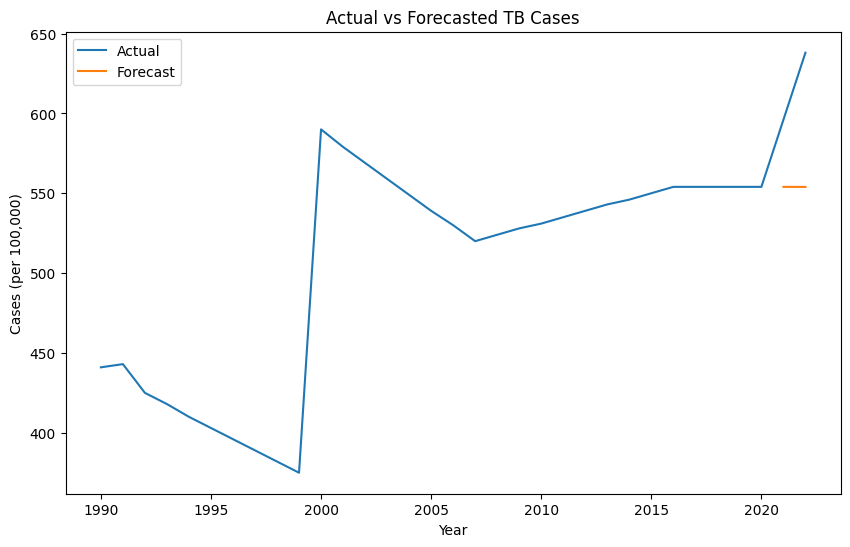

In [ ]:
import matplotlib.pyplot as plt

forecaste_data = {'Date': [2021,2022], 'Forecast':[forecast[0],forecast[1]]}
forecasted = pd.DataFrame(forecaste_data)

plt.figure(figsize=(10, 6))
plt.plot(tbcases.Date, tbcases['cases(per 100000)'], label='Actual')
plt.plot(forecasted['Date'], forecasted['Forecast'], label='Forecast', linestyle='-')
plt.title('Actual vs Forecasted TB Cases')
plt.xlabel('Year')
plt.ylabel('Cases (per 100,000)')
plt.legend()
plt.show()